<a href="https://colab.research.google.com/github/vijaybalaji0606/prodigy_infotech_tasks/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER SEGEMENTATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

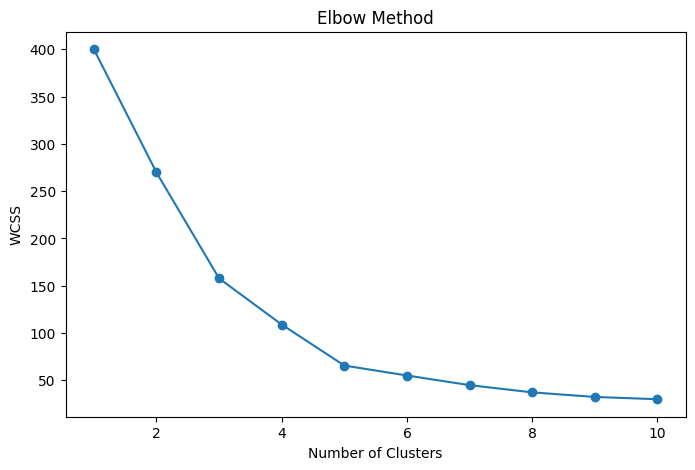

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
data['Cluster'] = y_kmeans

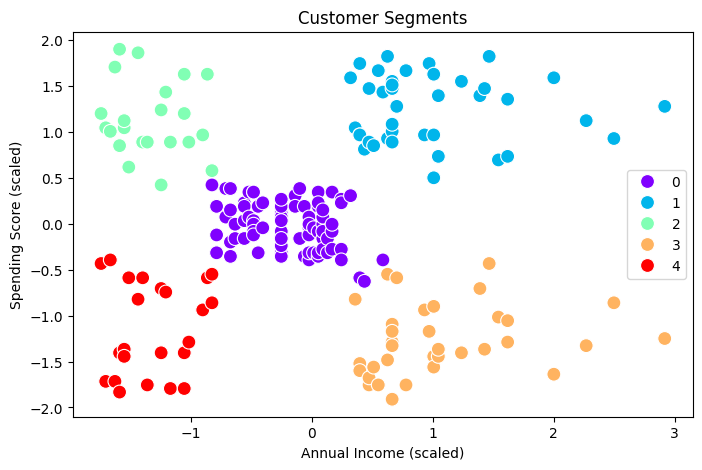

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_kmeans, palette='rainbow', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [ ]:
score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5546571631111091


In [ ]:
data.to_csv('Customer_Segmentation_Results.csv', index=False)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,2
4,5,1,31,17,40,4
